In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# read accidents csv file
df = pd.read_csv("accidents.csv")
print(df.head())

  LIGHT_CONDITION weather SPEED_ZONE  speed  type of road PILLION  \
0            dusk   snowy      rural    104      straight     yes   
1           night   snowy      rural     56  intersection      no   
2            dusk   clear    highway     29  intersection      no   
3            dusk   rainy    highway     62      straight      no   
4            dusk   snowy      urban     54  intersection      no   

  type of vehicle  SEVERITY  
0             car         5  
1           truck         1  
2             car         2  
3      motorcycle         5  
4      motorcycle         2  


In [11]:
df.shape

(300, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      300 non-null    datetime64[ns]
 1   Time      300 non-null    object        
 2   Severity  300 non-null    object        
 3   DateTime  300 non-null    datetime64[ns]
 4   Hour      300 non-null    int32         
 5   Weekday   300 non-null    object        
 6   Month     300 non-null    object        
dtypes: datetime64[ns](2), int32(1), object(4)
memory usage: 15.4+ KB


In [4]:
# Generate random data
np.random.seed(42)
num_records = 300

# Dates, Times, Severity
dates = pd.date_range(start="2024-01-01", periods=num_records, freq='D')
times = np.random.choice(pd.date_range("00:00", "23:59", freq="1H").time, size=num_records)
severities = np.random.choice(['Low', 'Medium', 'High'], size=num_records)

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Time': times,
    'Severity': severities
})



C:\Users\ANIKET\AppData\Local\Temp\ipykernel_5532\4214841077.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = np.random.choice(pd.date_range("00:00", "23:59", freq="1H").time, size=num_records)


In [5]:
#Combine Date and Time, Extract Time Features

# Ensure 'Date' is datetime and 'Time' is string
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Time'].astype(str)

# Combine 'Date' and 'Time' into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'])

# Extract features from DateTime
df['Hour'] = df['DateTime'].dt.hour
df['Weekday'] = df['DateTime'].dt.day_name()
df['Month'] = df['DateTime'].dt.month_name()

# Display the updated DataFrame (optional)
print(df.head())

        Date      Time Severity            DateTime  Hour    Weekday    Month
0 2024-01-01  06:00:00     High 2024-01-01 06:00:00     6     Monday  January
1 2024-01-02  19:00:00      Low 2024-01-02 19:00:00    19    Tuesday  January
2 2024-01-03  14:00:00      Low 2024-01-03 14:00:00    14  Wednesday  January
3 2024-01-04  10:00:00      Low 2024-01-04 10:00:00    10   Thursday  January
4 2024-01-05  07:00:00      Low 2024-01-05 07:00:00     7     Friday  January


In [6]:
#Data Visualization

# Group by weekday (ensure order from Monday to Sunday)
weekday_avg = df['Weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Group by hour of the day and sort by hour (0–23)
hourly_distribution = df['Hour'].value_counts().sort_index()

# Group by month name (January–December)
monthly_counts = df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Display the outputs
print("📊 Average Accidents by Weekday:\n", weekday_avg)
print("\n⏱️ Hourly Distribution of Accidents:\n", hourly_distribution)
print("\n🗓️ Monthly Accident Counts:\n", monthly_counts)



📊 Average Accidents by Weekday:
 Weekday
Monday       43
Tuesday      43
Wednesday    43
Thursday     43
Friday       43
Saturday     43
Sunday       42
Name: count, dtype: int64

⏱️ Hourly Distribution of Accidents:
 Hour
0     17
1     14
2     18
3     11
4     12
5      9
6     18
7     15
8     14
9      8
10    10
11    15
12     8
13     7
14    13
15    13
16    13
17     9
18    11
19    16
20    10
21    11
22    13
23    15
Name: count, dtype: int64

🗓️ Monthly Accident Counts:
 Month
January      31.0
February     29.0
March        31.0
April        30.0
May          31.0
June         30.0
July         31.0
August       31.0
September    30.0
October      26.0
November      NaN
December      NaN
Name: count, dtype: float64


Text(0, 0.5, 'Number of Accidents')

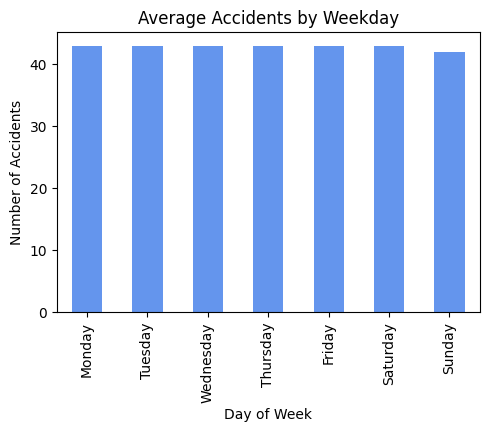

In [7]:
#plotting the charts

plt.figure(figsize=(12, 8))
# 1. Bar Chart - Accidents by Weekday
plt.subplot(2, 2, 1)
weekday_avg.plot(kind='bar', color='cornflowerblue')
plt.title('Average Accidents by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')


Text(0, 0.5, 'Number of Accidents')

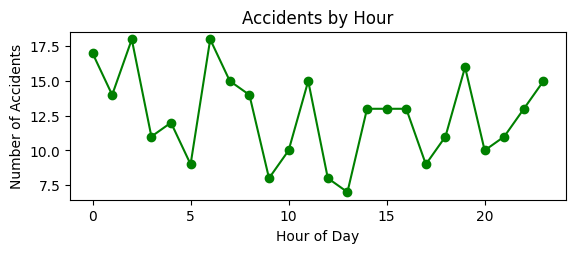

In [8]:
# 2. Line Chart - Accidents by Hour
plt.subplot(2, 1, 2)
hourly_distribution.plot(kind='line', marker='o', color='green')
plt.title('Accidents by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'Number of Accidents')

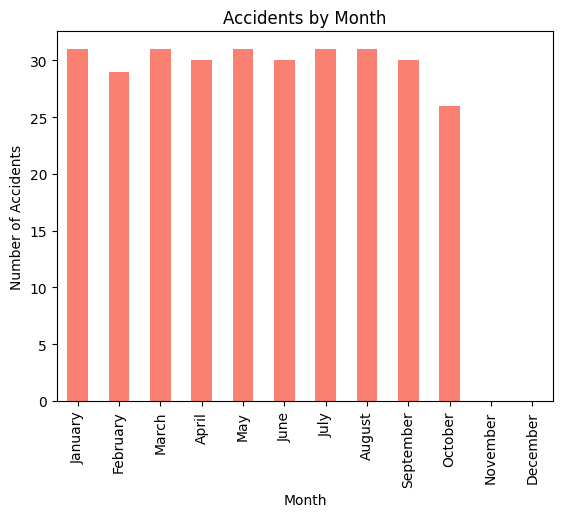

In [9]:
# Bar Chart - Accidents by Month
plt.subplot(1, 1, 1)
monthly_counts.plot(kind='bar', color='salmon')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

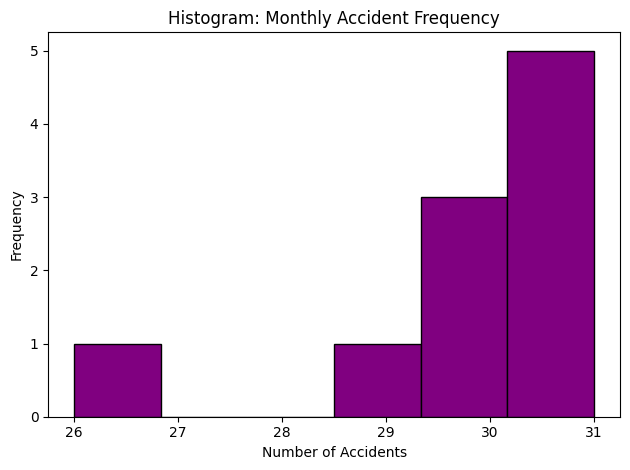

In [10]:
# Histogram - Monthly Accident Frequency
plt.subplot(1, 1, 1)
df['Month'].value_counts().plot(kind='hist', bins=6, color='purple', edgecolor='black')
plt.title('Histogram: Monthly Accident Frequency')
plt.xlabel('Number of Accidents')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()